In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv("HouseTS.csv")
df.head()

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,...,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-04-30,61870.0,245000.0,40.723982,130.528256,22.0,29.0,56.0,69.0,89.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202421.064584,Atlanta-Sandy Springs-Alpharetta
2,2012-05-31,125500.0,217450.0,63.913043,119.919216,24.0,40.0,63.0,60.0,144.5,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202681.309539,Atlanta-Sandy Springs-Alpharetta
3,2012-06-30,153000.0,189900.0,81.598080,105.617353,34.0,46.0,50.0,57.0,126.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,202998.603897,Atlanta-Sandy Springs-Alpharetta
4,2012-07-31,165500.0,154000.0,81.598080,83.921175,39.0,49.0,42.0,50.0,80.0,...,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,203781.903446,Atlanta-Sandy Springs-Alpharetta


In [12]:
print(df.columns)
print(df.describe())

sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'PRICE']])
plt.show()

Index(['date', 'median_sale_price', 'median_list_price', 'median_ppsf',
       'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings',
       'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list',
       'off_market_in_two_weeks', 'city', 'zipcode', 'year', 'bank', 'bus',
       'hospital', 'mall', 'park', 'restaurant', 'school', 'station',
       'supermarket', 'Total Population', 'Median Age', 'Per Capita Income',
       'Total Families Below Poverty', 'Total Housing Units', 'Median Rent',
       'Median Home Value', 'Total Labor Force', 'Unemployed Population',
       'Total School Age Population', 'Total School Enrollment',
       'Median Commute Time', 'price', 'city_full'],
      dtype='object')
       median_sale_price  median_list_price    median_ppsf  median_list_ppsf  \
count       8.840920e+05       8.840920e+05  884092.000000     884092.000000   
mean        3.941026e+05       4.229849e+05     223.068328        231.169836   
std         3.815481e+05   

KeyError: "None of [Index(['RM', 'LSTAT', 'PTRATIO', 'PRICE'], dtype='object')] are in the [columns]"

In [13]:
print(df.columns.tolist())

['date', 'median_sale_price', 'median_list_price', 'median_ppsf', 'median_list_ppsf', 'homes_sold', 'pending_sales', 'new_listings', 'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list', 'off_market_in_two_weeks', 'city', 'zipcode', 'year', 'bank', 'bus', 'hospital', 'mall', 'park', 'restaurant', 'school', 'station', 'supermarket', 'Total Population', 'Median Age', 'Per Capita Income', 'Total Families Below Poverty', 'Total Housing Units', 'Median Rent', 'Median Home Value', 'Total Labor Force', 'Unemployed Population', 'Total School Age Population', 'Total School Enrollment', 'Median Commute Time', 'price', 'city_full']


In [14]:
features = [
    'median_list_price', 'median_ppsf', 'median_list_ppsf', 'homes_sold', 'pending_sales',
    'new_listings', 'inventory', 'median_dom', 'avg_sale_to_list', 'sold_above_list', 'off_market_in_two_weeks',
    'Total Population', 'Median Age', 'Per Capita Income', 'Total Families Below Poverty',
    'Total Housing Units', 'Median Rent', 'Median Home Value', 'Total Labor Force', 'Unemployed Population',
    'Total School Age Population', 'Total School Enrollment', 'Median Commute Time',
    'bank', 'bus', 'hospital', 'mall', 'park', 'restaurant', 'school', 'station', 'supermarket'
]

target = 'price'  # or 'median_sale_price'

In [15]:
# Drop rows with missing values in these columns (simple approach)
df_model = df[features + [target]].dropna()

In [16]:
X = df_model[features]
y = df_model[target]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 23356009003.250046


In [18]:
coefficients = pd.Series(model.coef_, index=features)
print(coefficients.sort_values(ascending=False))


sold_above_list                 68825.502369
off_market_in_two_weeks         15542.939984
mall                             1387.790454
station                          1147.655102
bank                             1126.255016
supermarket                       545.790566
homes_sold                        193.530152
median_list_ppsf                  141.530193
new_listings                       40.456848
median_dom                         38.661658
Total School Age Population        26.766991
Total School Enrollment            26.766990
median_ppsf                        18.412028
Total Families Below Poverty       14.292257
Per Capita Income                   1.194452
Median Home Value                   1.132864
Median Commute Time                 1.076130
median_list_price                   0.005706
Total Housing Units                -0.502152
Unemployed Population             -13.264979
Total Labor Force                 -14.148262
pending_sales                     -33.391390
Median Ren

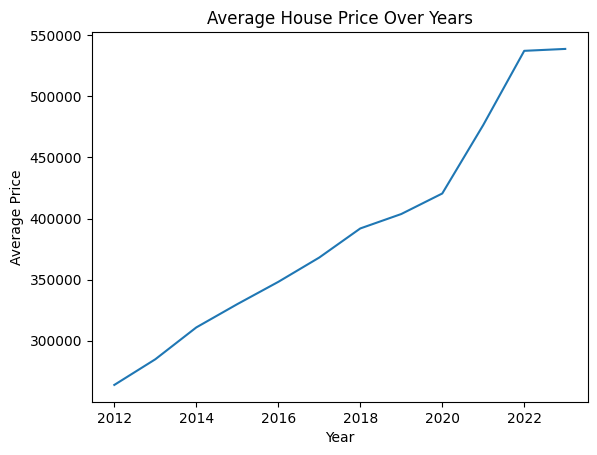

In [19]:
df['year'] = pd.to_datetime(df['date']).dt.year

yearly_avg = df.groupby('year')[features + [target]].mean()

import matplotlib.pyplot as plt

plt.plot(yearly_avg.index, yearly_avg[target])
plt.title('Average House Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [20]:
# Convert 'date' column to datetime dtype if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a new column 'year'
df['year'] = df['date'].dt.year

print("Available years:", df['year'].unique())

Available years: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]


In [21]:
# Make sure the 'year' column exists
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter for 2023 and compute the average price
avg_price_2023 = df.loc[df['year'] == 2023, 'price'].mean()

print(f"Average house price in 2023: ${avg_price_2023:,.2f}")

Average house price in 2023: $538,811.69


In [24]:
# Make sure the 'year' column exists
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year

# Filter for 2023 and compute the average price
avg_price_2012 = df.loc[df['year'] == 2012, 'price'].mean()

print(f"Average house price in 2012: ${avg_price_2012:,.2f}")


Average house price in 2012: $263,871.80


In [25]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [26]:
# Filter for each year
df_2023 = df[df['year'] == 2023]
df_2012 = df[df['year'] == 2012]

# Group by month and calculate average price
avg_price_2023 = df_2023.groupby('month')['price'].mean()
avg_price_2012 = df_2012.groupby('month')['price'].mean()


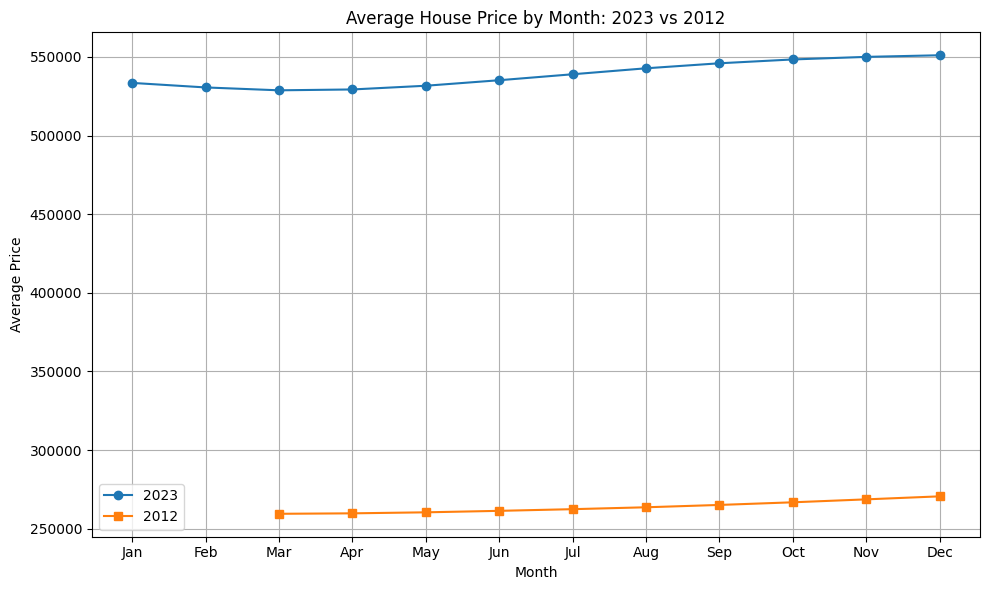

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot each year's data
plt.plot(avg_price_2023.index, avg_price_2023.values, marker='o', label='2023')
plt.plot(avg_price_2012.index, avg_price_2012.values, marker='s', label='2012')

# Customize plot
plt.title('Average House Price by Month: 2023 vs 2012')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
